In [ ]:
# Setup autoreload and add parent dir to sys.path
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'..')

In [1]:
import gpflow
import numpy as np
import matplotlib
import seaborn as sns
import tensorflow as tf

# The lines below are specific to the notebook format
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 20
plt = matplotlib.pyplot

2022-07-13 12:41:29.629713: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-13 12:41:29.632846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 12:41:29.632855: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


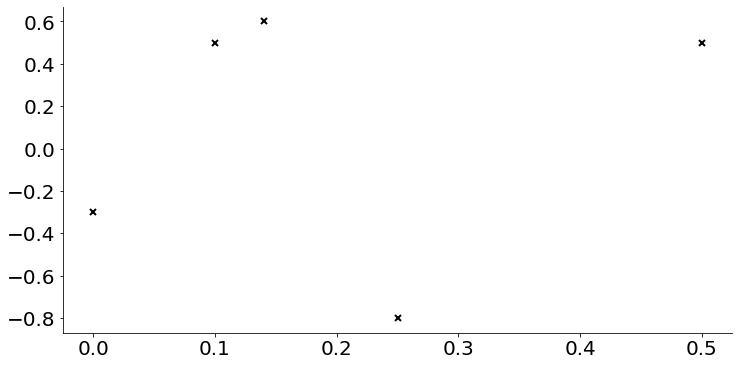

In [3]:
D = np.array([[0, -0.3], [0.1, 0.5], [0.14, 0.6], [0.25, -0.8],  [0.5, .5]])
D_prime = np.delete(D, 3, axis=0)
X = D[:, 0].reshape(-1, 1)
Y = D[:, 1].reshape(-1, 1)

_ = plt.plot(X, Y, "kx", mew=2)
sns.despine()

In [4]:
k = gpflow.kernels.SquaredExponential()
k

2022-05-27 10:33:02.429432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-27 10:33:02.429489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-27 10:33:02.429521: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-27 10:33:02.431320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2022-05-27 10:33:02.431357: W tensorflow/stream_executor/platform/default/dso_loader

name,class,transform,prior,trainable,shape,dtype,value
SquaredExponential.variance,Parameter,Softplus,,True,(),float64,1
SquaredExponential.lengthscales,Parameter,Softplus,,True,(),float64,1


In [2]:
gp_model = gpflow.models.GPR(data=(X, Y), kernel=k, mean_function=None)
gp_model.likelihood.variance.assign(0.1)
gp_model.kernel.lengthscales.assign(0.01)
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(gp_model.training_loss, gp_model.trainable_variables, options=dict(maxiter=100))

NameError: name 'gpflow' is not defined

In [1]:
## generate test points for prediction
xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)  # test points must be of shape (N, D)

## predict mean and variance of latent GP at test points
mean, var = gp_model.predict_f(xx)

## generate 10 samples from posterior
tf.random.set_seed(1)  # for reproducibility
samples = gp_model.predict_f_samples(xx, 15)  # shape (10, 100, 1)

## plot
plt.figure(figsize=(12, 6))
plt.plot(xx, mean, c="C0", lw=2)
plt.fill_between(
    xx[:, 0],
    mean[:, 0] - 1.96 * np.sqrt(var[:, 0]),
    mean[:, 0] + 1.96 * np.sqrt(var[:, 0]),
    color="#A2D2FF",
    alpha=0.25,
)

plt.plot(xx, samples[:, :, 0].numpy().T, c="#A2D2FF", linewidth=0.5, alpha=1.)
_ = plt.xlim(-0.1, 0.7)
plt.plot(X, Y, "kx", mew=2)
sns.despine()
plt.savefig("figures/gpr_fit_marg_lik.svg")
#plt.savefig("figures/gpr_fit.svg")

NameError: name 'gp_model' is not defined